# 神经网络(Neural NetWork)模型的搭建(nn.Module的使用)

In [19]:
#导入库
import torch.nn as nn
import torch
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter

In [3]:
#简单神经网络搭建测试
class Network(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self,input):
        output = input**2
        return output
    
network = Network()
x = torch.tensor(2)
test_result = network(x)
print(test_result)

tensor(4)


## 卷积神经网络中的参数演示
weight为卷积核

stride意义为步进，为卷积核每次移动的距离(可以为单个数字或者元组)

padding默认不进行填充

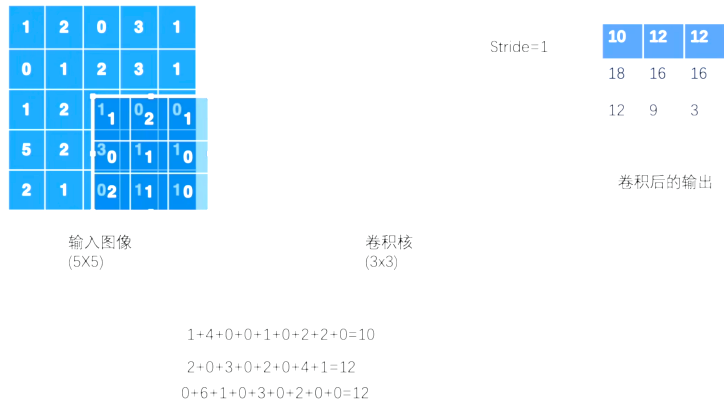

In [1]:
#卷积操作
import torch
input = torch.tensor([[1, 2, 0, 3, 1],
                      [0, 1, 2, 3, 1],
                      [1, 2, 1, 0, 0],
                      [5, 2, 3, 1, 1],
                      [2, 1, 0, 1, 1]])
kernel = torch.tensor([[1, 2, 1],
                       [0, 1, 0],
                       [2, 1, 0]])
print(input.shape)
print(kernel.shape)

torch.Size([5, 5])
torch.Size([3, 3])


In [4]:
# 进行尺寸变换,使输入数据满足尺寸参数要求
input_reshape = torch.reshape(input, (1, 1, 5, 5))
kernel_reshape = torch.reshape(kernel, (1, 1, 3, 3))
print(input_reshape.shape)
print(kernel_reshape.shape)

torch.Size([1, 1, 5, 5])
torch.Size([1, 1, 3, 3])


In [6]:
#测试神经网路输出,步进为1
output = F.conv2d(input_reshape, kernel_reshape, stride=1)
print(output)

tensor([[[[10, 12, 12],
          [18, 16, 16],
          [13,  9,  3]]]])


In [7]:
#步进为2
output2 = F.conv2d(input_reshape, kernel_reshape, stride=2)
print(output2) 

tensor([[[[10, 12],
          [13,  3]]]])


In [8]:
#padding设置，默认不进行填充
output3 = F.conv2d(input_reshape, kernel_reshape, stride=1, padding=1)
print(output3)

tensor([[[[ 1,  3,  4, 10,  8],
          [ 5, 10, 12, 12,  6],
          [ 7, 18, 16, 16,  8],
          [11, 13,  9,  3,  4],
          [14, 13,  9,  7,  4]]]])


使用padding参数进行图像填充,扩充尺寸为1，默认填充值为0

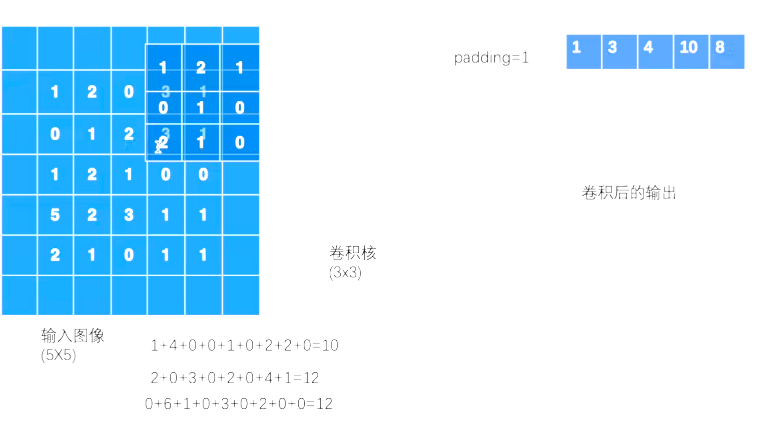

## 神经网络——卷积层
nn.conv1d -- 1维卷积

nn.conv2d -- 2维卷积

In [9]:
import torchvision
from torch.utils.data import DataLoader


dataset = torchvision.datasets.CIFAR10(root="../data", train = False, transform= torchvision.transforms.ToTensor(), download = True)
dataloader = DataLoader(dataset, batch_size=64)

100.0%


Extracting ../data\cifar-10-python.tar.gz to ../data


In [14]:
from torch.nn import Conv2d
class Neural_Network(nn.Module):
    def __init__(self):
        super(Neural_Network, self).__init__()
        self.conv1 = Conv2d(in_channels=3, out_channels=6, kernel_size=3, stride=1, padding=0)
    
    def forward(self, x):
        x = self.conv1(x)
        return x
    
neural_network = Neural_Network()
print(neural_network)
    
    

Neural_Network(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
)


In [22]:
writer = SummaryWriter("neural_network_logs")
step = 0
for data in dataloader:
    imgs, targets = data
    output = neural_network(imgs)
    # print(imgs.shape)
    # print(output.shape)
    writer.add_images(tag="neural_network_input", img_tensor= imgs, global_step= step)
    output = torch.reshape(output,(-1, 3, 30, 30))
    writer.add_images(tag="neural_network_output", img_tensor= output, global_step= step)
    step += 1
writer.close()